<a href="https://colab.research.google.com/github/dinesh842/python-/blob/main/cancer_deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn import datasets,metrics
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cancer=datasets.load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
X=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y=cancer.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X.shape

(569, 30)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [12]:
X_train.shape

(455, 30)

In [13]:
X_test.shape

(114, 30)

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
X_train=X_train.reshape(455,30,1)
X_test=X_test.reshape(114,30,1)


In [19]:
! pip install Sequential

  Created wheel for Sequential: filename=sequential-1.0.0-cp37-none-any.whl size=2862 sha256=7ef9438efc38bacf9e359e7287ac6db34cd482437d933ae0f2a3be64c1c716d9
  Stored in directory: /root/.cache/pip/wheels/5a/89/ee/1f8d0c0156b5cbf5ae26a0caa7c6de3db7c1581d8b5a04ea27
Successfully built Sequential


In [30]:
epochs=50
model=Sequential()
model.add(Conv1D(filters=32, kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


In [31]:
model.add(Conv1D(filters=64, kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


In [32]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [34]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 32ms/step - loss: 1.0109 - accuracy: 0.5664 - val_loss: 0.6159 - val_accuracy: 0.9035
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5544 - accuracy: 0.7278 - val_loss: 0.5623 - val_accuracy: 0.8421
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.4466 - accuracy: 0.8267 - val_loss: 0.5206 - val_accuracy: 0.8158
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.3898 - accuracy: 0.8295 - val_loss: 0.4877 - val_accuracy: 0.7982
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.3521 - accuracy: 0.8598 - val_loss: 0.4613 - val_accuracy: 0.7982
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.3908 - accuracy: 0.8320 - val_loss: 0.4390 - val_accuracy: 0.7895
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.3030 - accuracy: 0.8880 - val_loss: 0.4207 - val_accuracy: 0.7895
Epoch 8/50
15

In [43]:
def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  

In [44]:
history.history

{'accuracy': [0.58681321144104,
  0.7362637519836426,
  0.8131868243217468,
  0.8263736367225647,
  0.8769230842590332,
  0.8593406677246094,
  0.894505500793457,
  0.8901098966598511,
  0.9208791255950928,
  0.9120879173278809,
  0.9318681359291077,
  0.903296709060669,
  0.9318681359291077,
  0.9164835214614868,
  0.9208791255950928,
  0.9186813235282898,
  0.9516483545303345,
  0.9428571462631226,
  0.9340659379959106,
  0.9274725317955017,
  0.9340659379959106,
  0.9494505524635315,
  0.9472527503967285,
  0.9494505524635315,
  0.9494505524635315,
  0.9406593441963196,
  0.9494505524635315,
  0.9516483545303345,
  0.9472527503967285,
  0.9538461565971375,
  0.9626373648643494,
  0.9384615421295166,
  0.9472527503967285,
  0.9516483545303345,
  0.9494505524635315,
  0.9494505524635315,
  0.9472527503967285,
  0.9582417607307434,
  0.9450549483299255,
  0.9604395627975464,
  0.9604395627975464,
  0.9516483545303345,
  0.9428571462631226,
  0.9714285731315613,
  0.9670329689979553,
  

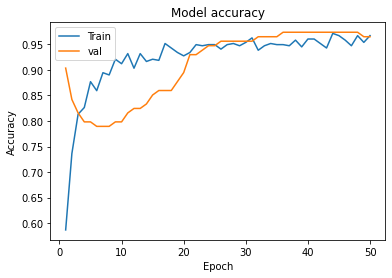

In [45]:
plot_learningCurve(history,epochs)